# 18460 Project

In [430]:
%load_ext autoreload
%autoreload 2

from tasks import *
import numpy as np
from server import Server
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First, we initialize the task for a given configuration

In [431]:
#task = lrt.LinearRegressionTask(lrt.solo_config) # Linear regression
#task = ct.CircleTask(ct.solo_config) # Circle
task = lgrt.LogisticRegressionTask() # Logistic regression with mushrooms

Intializing task LogisticRegressionTask with config LRTConfig(clients=[<Computation.HIGH: 1>, <Computation.HIGH: 1>, <Computation.LOW: 2>, <Computation.LOW: 2>], lr=0.00148, number=200)


Seeing the data

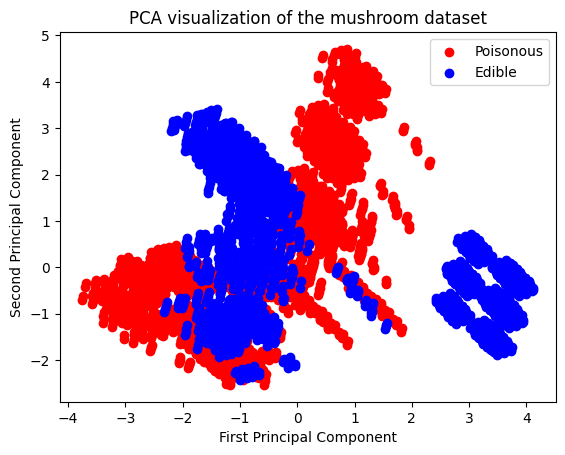

In [432]:
task.visualize()

Solve iteratively using federated learning

In [433]:
# Create server and initialize clients, before iteratively updating the consensus variables
server = Server(task)
server.connect_clients() # create clients with problem description including a partition of the dataset

start_time = time.perf_counter()
problem = task.get_problem()

k = 0
last_cost = float('infinity')
while k < problem.max_iter and server.delta > problem.tol:
    consensus = server.consensus.flatten()
    
    current_cost = problem.loss(consensus, task.dataset, problem.hyper_parameters)
    
    if k % 500 == 0:
        print(f'''
        Iteration {k}: {consensus}
        Cost: {current_cost}

        ''')
    
    # perform new iteration
    server.run_iteration(k+1)
    
    if np.linalg.norm(current_cost - last_cost) < problem.ctol:
        print(f"Condition reached: change in cost is {np.linalg.norm(current_cost - last_cost)} "
              f"which is smaller than {problem.ctol}")
        last_cost = current_cost
        break
        
    last_cost = current_cost
    
    k = k + 1
    
solution = server.consensus.flatten()
end_time = time.perf_counter()
if k >= problem.max_iter and server.delta > problem.tol:
    raise Exception("Did not converge")
    
if server.delta <= problem.tol:
    print(f"Condition reached: change in solution is {server.delta} "
          f"which is smaller than {problem.tol}")

print("")
print(f"Solution: {solution}")
print(f"Associated cost: {last_cost}")
print(f"Achieved in {k} iterations")
print(f"Elasped time: {end_time - start_time}")


        Iteration 0: [-0.42148982  1.47904352 -1.49047171 -0.28585241  0.46426072  0.45352469
 -0.5268217  -0.83938919  0.59293221  0.20602743 -1.69578991 -0.2745306
  0.21078981  0.62779157  0.30066392 -0.44251352 -0.65117326 -0.09002801
 -0.09558015 -1.34361833 -0.31507298 -1.02447298 -0.25135392]
        Cost: 12425.74942835523

        

        Iteration 500: [-0.15759375  1.04353343 -0.68983767 -0.4280963   0.57868746  0.51940783
 -0.79133749  0.95652322  0.22248061 -0.82612486 -1.03751419 -0.33918352
 -0.03189107 -0.00536946 -0.14444729 -0.44251352 -0.19654291 -0.20145312
 -0.65690798 -0.61092395 -0.31589487 -0.69504107 -0.34073663]
        Cost: 3854.450195118866

        

        Iteration 1000: [-0.09885842  0.88373452 -0.6044035   0.01139343  0.61715201  0.50653497
 -0.66599952  1.36854835  0.18815323 -1.35279902 -1.0156601  -0.33199782
 -0.03437088 -0.19742512 -0.28982524 -0.44251352 -0.09888824 -0.22715479
 -1.30764334 -0.68837192 -0.25542543 -0.62613635 -0.4119735 ]
   

## Visualization of the solution

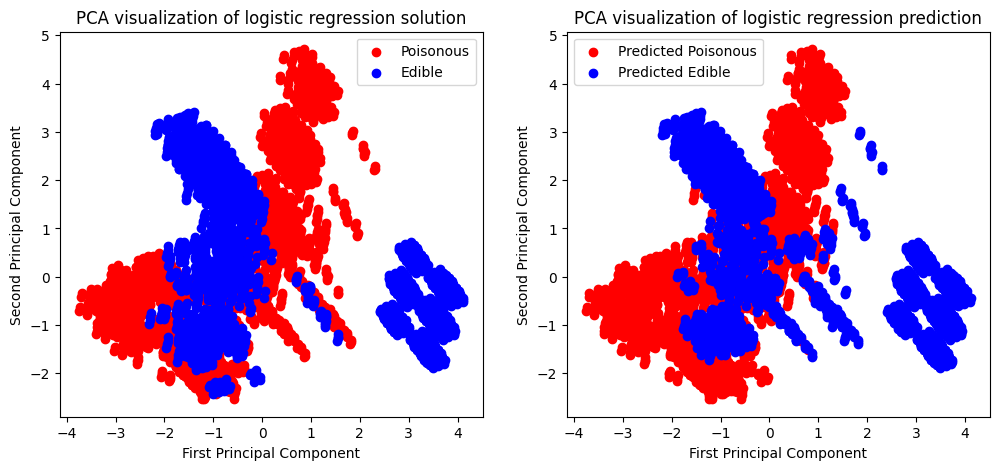

In [434]:
task.visualize_solution(solution)